In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision as tv
from PIL import Image
import glob
import os
import tqdm
import cv2

In [239]:
torch.cuda.is_available()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [240]:
path='./data/kaggle_3m/data.csv'
data=pd.read_csv(path)

In [241]:
data

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,TCGA_HT_8563,2.0,5.0,3,1.0,NaN,2.0,2,1.0,2.0,1.0,3.0,2.0,1.0,30.0,3.0,2.0,0.0
106,TCGA_HT_A5RC,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,1.0,2.0,1.0,70.0,3.0,2.0,1.0
107,TCGA_HT_A616,NaN,5.0,2,1.0,NaN,2.0,1,1.0,1.0,1.0,1.0,2.0,1.0,36.0,3.0,2.0,0.0
108,TCGA_HT_A61A,NaN,5.0,2,NaN,NaN,NaN,1,3.0,1.0,1.0,1.0,6.0,1.0,20.0,3.0,2.0,0.0


In [242]:
path='./data/kaggle_3m/'
img_path=pd.DataFrame({'patient':[],'x':[],'y':[]})

for sub_dir in glob.glob(path+'*'):
    
    try:
        for filename in os.listdir(sub_dir):
            if(not filename.__contains__('mask')):
                img_path.loc[len(img_path.index)]=[sub_dir.split('\\')[-1],sub_dir+'/'+filename,sub_dir+'/'+filename.replace('.tif','_mask.tif')]
            
    except:
        print(sub_dir)

img_path

./data/kaggle_3m\data.csv
./data/kaggle_3m\README.md


,patient,x,y
0,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
1,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
2,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
3,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
4,TCGA_CS_4941_19960909,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...,./data/kaggle_3m\TCGA_CS_4941_19960909/TCGA_CS...
...,...,...,...
3924,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3925,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3926,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3927,TCGA_HT_A61B_19991127,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...,./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...


In [243]:
transforms= tv.transforms.Compose([tv.transforms.ToTensor()])


In [244]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self,path_df,transforms=None):
        self.data=path_df
        self.transforms=transforms
    def __len__(self):
        return len(self.data['patient'])
    
    def __getitem__(self,idx):
        x=Image.open(self.data['x'][idx])
        y=Image.open(self.data['y'][idx])
        #return x,y
       
        
        if self.transforms:
            return self.transforms(x), self.transforms(y)
        else:
            return x,y
        

In [245]:
countOfRows=img_path.shape[0]
trainData=img_path[countOfRows//10:countOfRows].reset_index(drop=True)
testData=img_path[0:countOfRows//10].reset_index(drop=True)
trainData['y']


0       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
1       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
2       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
3       ./data/kaggle_3m\TCGA_DU_5849_19950405/TCGA_DU...
4       ./data/kaggle_3m\TCGA_DU_5851_19950428/TCGA_DU...
                              ...                        
3532    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3533    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3534    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3535    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
3536    ./data/kaggle_3m\TCGA_HT_A61B_19991127/TCGA_HT...
Name: y, Length: 3537, dtype: object

In [246]:
trainDataset=MyDataset(trainData,transforms)
trainDataloader= torch.utils.data.DataLoader(trainDataset,batch_size=10)


In [247]:
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)
model=model.to(device)

Using cache found in C:\Users\kryzh/.cache\torch\hub\mateuszbuda_brain-segmentation-pytorch_master


In [248]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4, betas=(0.9, 0.999))


In [249]:
epochs=10
for epoch in range(epochs):
    loss_val=0
    acc_val=0

    for sample in trainDataloader:
        img,label = sample
        
        label = label.to(device)
        
        img = img.to(device)
        
        optimizer.zero_grad()
        pred = model(img)
        
        loss = loss_fn(pred, label)
        loss.backward()

        optimizer.step()
        
        loss_val+=loss.item()
        
        # acc_val += get_accuracy(pred.cpu(), label.cpu())
    loss_val /= len(trainDataloader)
    acc_val /= len(trainDataloader)
    print("loss=",loss_val ,"accruracy=",acc_val)

loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0
loss= 0.0 accruracy= 0.0


In [250]:
testDataset=MyDataset(testData,transforms)
testDataloader= torch.utils.data.DataLoader(testDataset,batch_size=1)

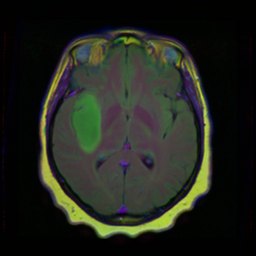

(1, 256, 256)


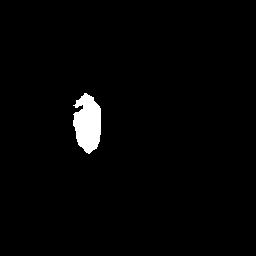

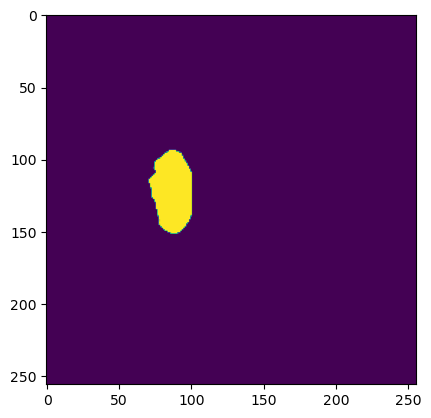

In [277]:
def realCheck():

    path=".\\data\\kaggle_3m\\TCGA_CS_4942_19970222\\TCGA_CS_4942_19970222_10.tif"
    img=Image.open(path)
    display(img)
    tensorImg=transforms(img)
    batchImg=torch.unsqueeze(tensorImg,0)
    batchImg=batchImg.to(device)
    out=model(batchImg).cpu().detach().numpy()
    out=out.squeeze(0)
    print(out.shape)
    # out=out.tolist()
    transform = tv.transforms.ToPILImage()
    
    plt.imshow(out.transpose((1,2,0)))
    path=".\\data\\kaggle_3m\\TCGA_CS_4942_19970222\\TCGA_CS_4942_19970222_10_mask.tif"
    img=Image.open(path)
    display(img)
realCheck()